**Objective**

Perform Exploratory Data Analysis (EDA) on the Titanic dataset to understand patterns, correlations, and key factors affecting passenger survival.

**1. Imports & Setup**

In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Configure visualization style
sns.set(style='whitegrid')
%matplotlib inline


# Display more columns if needed
pd.options.display.max_columns = 100

**2. Load Dataset**

We’re loading the **Titanic dataset**, which contains information about passengers such as **age**, **class**, **sex**, and whether they **survived**.

In [4]:
# Load Titanic dataset (ensure tested.csv is in the same folder)
df = pd.read_csv('tested.csv')

# Display shape and first few rows
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**3. Basic Overview**

This provides an overview of data types, missing values, and statistical summaries (mean, median, etc.).

In [5]:
# Info and summary statistics
df.info()
df.describe(include='all').T
for col in ['Survived','Pclass','Sex','Embarked']:
    print(df[col].value_counts(dropna=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
Survived
0    266
1    152
Name: count, dtype: int64
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
Sex
male      266
female    152
Name: count, dtype: int64
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


**4. Missing Value Check**

We identify which columns have missing data. Titanic typically has missing values in Age, Cabin, and Embarked.

In [6]:
# Check for missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Cabin    327
Age       86
Fare       1
dtype: int64

**5. Data Cleaning & Imputation**

*  FamilySize gives total family members aboard.
*  Title provides social status.
*  We use median Age imputation by grouping to retain realistic age patterns.
*  Cabin is dropped since it’s mostly missing






In [12]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Extract Title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^.]*)\.')

# Impute missing Age by median grouped by Pclass and Sex
df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill Embarked with mode if missing
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin if present
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True, errors='ignore')
    print(df.columns)


**6. Univariate Analysis (Single Variable)**


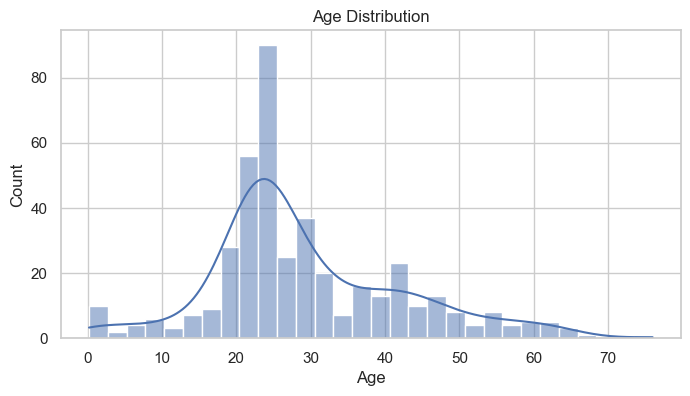

In [13]:
# Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


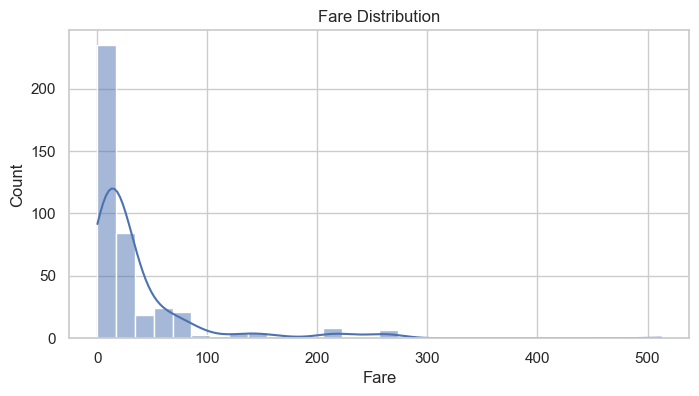

In [14]:
# Fare Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()


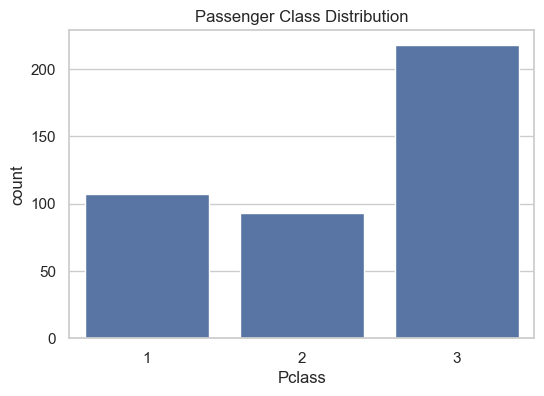

In [15]:
# Passenger Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()


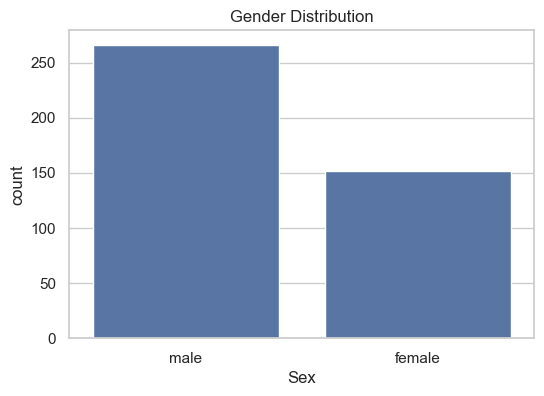

In [16]:
# Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

Most passengers are from Class 3 and majority are males. Fare distribution is highly skewed.

**7. Bivariate Analysis (Target vs Other Variables)**

Females and first-class passengers had higher survival rates. Younger passengers had slightly higher chances of survival.

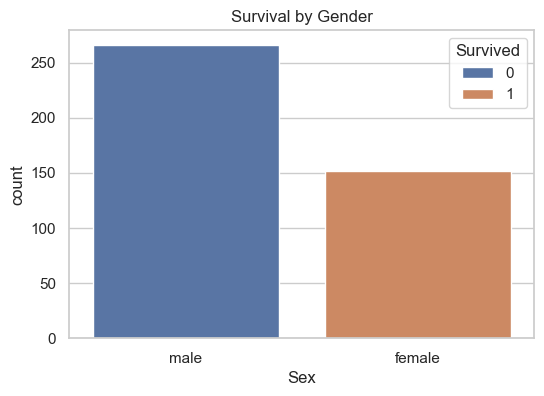

In [17]:
# Survival by Sex
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()


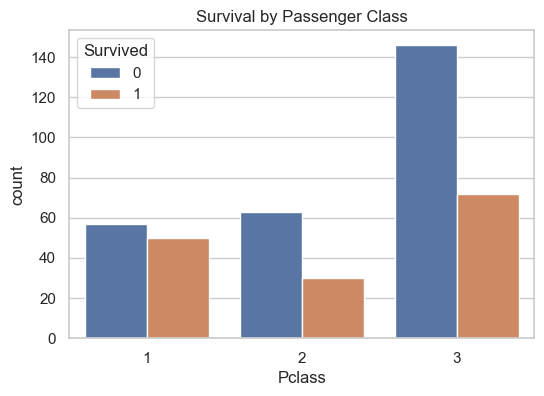

In [18]:
# Survival by Pclass
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


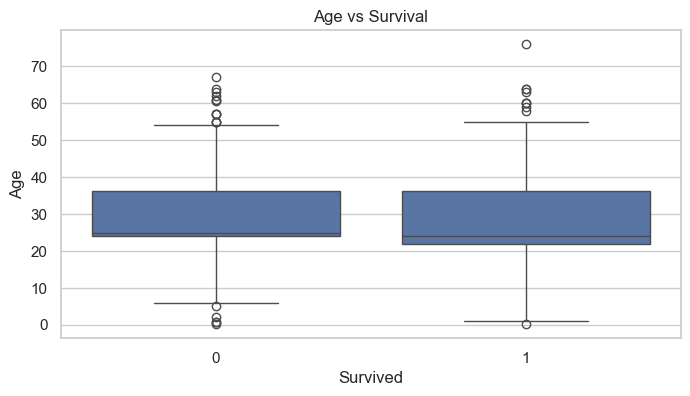

In [19]:
# Age vs Survival
plt.figure(figsize=(8,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

**8. Correlation Analysis**


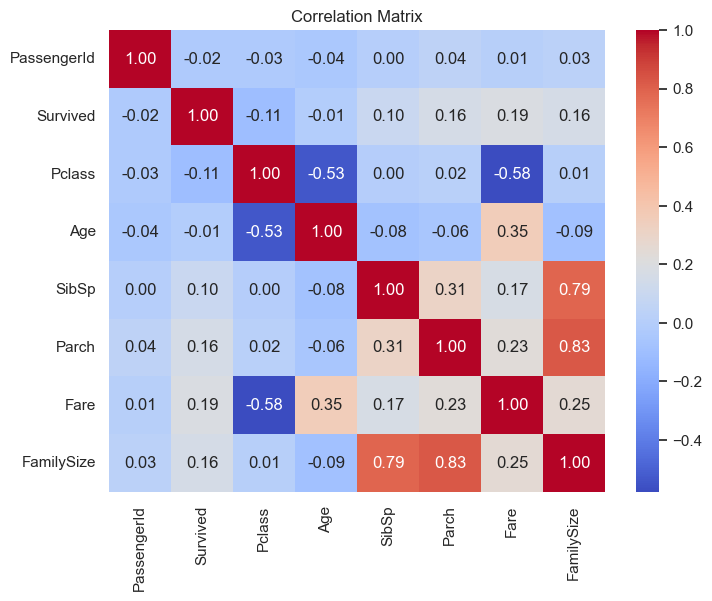

In [20]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Pclass and Fare show moderate negative correlation. Survival correlates positively with Fare and inversely with Pclass.

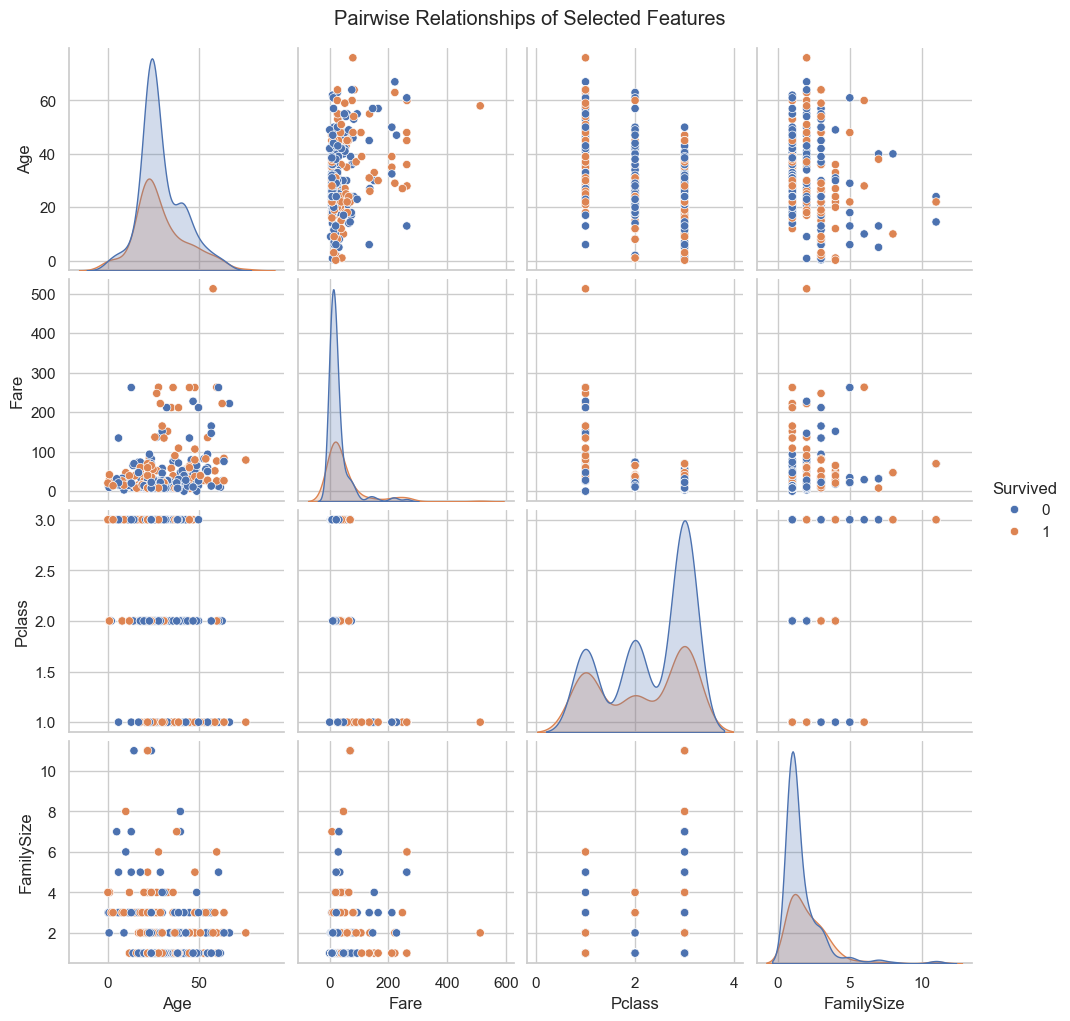

In [22]:
# Pairplot to visualize pairwise relationships
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'FamilySize', 'Survived']].dropna(), hue='Survived', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02)
plt.show()

**9. Outlier Detection**

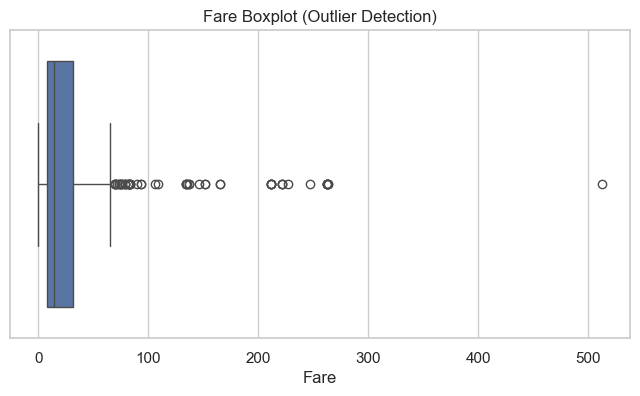

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'])
plt.title('Fare Boxplot (Outlier Detection)')
plt.show()

There are extreme Fare outliers (rich passengers). We’ll use a log transformation

**10. Handling Skewed Data**

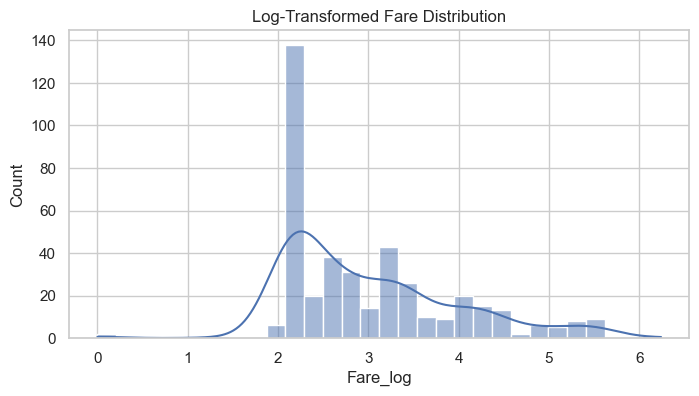

In [24]:
# Apply log transformation to Fare
df['Fare_log'] = np.log1p(df['Fare'])

plt.figure(figsize=(8,4))
sns.histplot(df['Fare_log'], kde=True, bins=30)
plt.title('Log-Transformed Fare Distribution')
plt.show()

After log transformation, Fare distribution becomes more normal and suitable for analysis.

**11. Feature Engineering**

In [26]:
# Create Age and Family size bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,40,60,100], labels=['Child','Teen','Adult','MiddleAge','Senior'])
df['FamilyCategory'] = pd.cut(df['FamilySize'], bins=[0,1,3,10], labels=['Single','Small','Large'])

# Clean up rare titles
title_map = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title_clean'] = df['Title'].replace(title_map, 'Other')

# Save cleaned dataset
df.to_csv('titanic_eda_cleaned.csv', index=False)

**12. Summary**


1.  Female passengers had a much higher survival rate (74%) compared to males (19%).
2.   Higher-class passengers (1st class) were more likely to survive.
3.   Fare is highly skewed log transformation improves distribution.
4.   Age and family size influence survival moderately.
5.   Many missing Cabin values were dropped; Age imputed using median by Pclass & Sex.



